In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib
import os

In [43]:





# Load dataset
df = pd.read_csv("../data/raw_data.csv")

print(df.head())




  Company_ID Industry_Type Company_Size Location_Region  \
0      C0640        Pharma       Medium           Rural   
1      C1460       Textile       Medium           Rural   
2      C1839          Food        Small           Rural   
3      C1646    Automobile        Small      Semi-Urban   
4      C0149          Food        Small           Rural   

   Total_Waste_Generated_kg_per_month  Biodegradable_Waste_%  \
0                            17332.66                     42   
1                            15774.52                     20   
2                             3487.97                     45   
3                              520.20                     12   
4                             1861.76                     62   

   Recyclable_Waste_%  Hazardous_Waste_%  Waste_Segregation_Level_%  \
0                  48                 10                         67   
1                  40                 40                         70   
2                  35                 20       

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Company_ID                             2000 non-null   object 
 1   Industry_Type                          2000 non-null   object 
 2   Company_Size                           2000 non-null   object 
 3   Location_Region                        2000 non-null   object 
 4   Total_Waste_Generated_kg_per_month     2000 non-null   float64
 5   Biodegradable_Waste_%                  2000 non-null   int64  
 6   Recyclable_Waste_%                     2000 non-null   int64  
 7   Hazardous_Waste_%                      2000 non-null   int64  
 8   Waste_Segregation_Level_%              2000 non-null   int64  
 9   Decomposition_Technique                2000 non-null   object 
 10  Decomposition_Efficiency_%             2000 non-null   int64  
 11  Recy

In [45]:


# Target
y = df["Perfect_Waste_Decomposition_System"]

# Drop non-useful ID column
X = df.drop(["Company_ID", "Perfect_Waste_Decomposition_System"], axis=1)

# Encode categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

print(X.head())




   Industry_Type  Company_Size  Location_Region  \
0              5             1                0   
1              6             1                0   
2              2             2                0   
3              0             2                1   
4              2             2                0   

   Total_Waste_Generated_kg_per_month  Biodegradable_Waste_%  \
0                            17332.66                     42   
1                            15774.52                     20   
2                             3487.97                     45   
3                              520.20                     12   
4                             1861.76                     62   

   Recyclable_Waste_%  Hazardous_Waste_%  Waste_Segregation_Level_%  \
0                  48                 10                         67   
1                  40                 40                         70   
2                  35                 20                         57   
3                  51   

In [46]:


# 3. Split into Train & Test Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1600, 27) (1600,)
Testing set shape: (400, 27) (400,)


In [47]:


# 4. Train a Classification Model

# You can start with Random Forest, since it handles mixed data well and gives feature importance.


# Train
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)






,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# 5. Evaluate the Model



y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Confusion Matrix:
 [[200   0]
 [  0 200]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



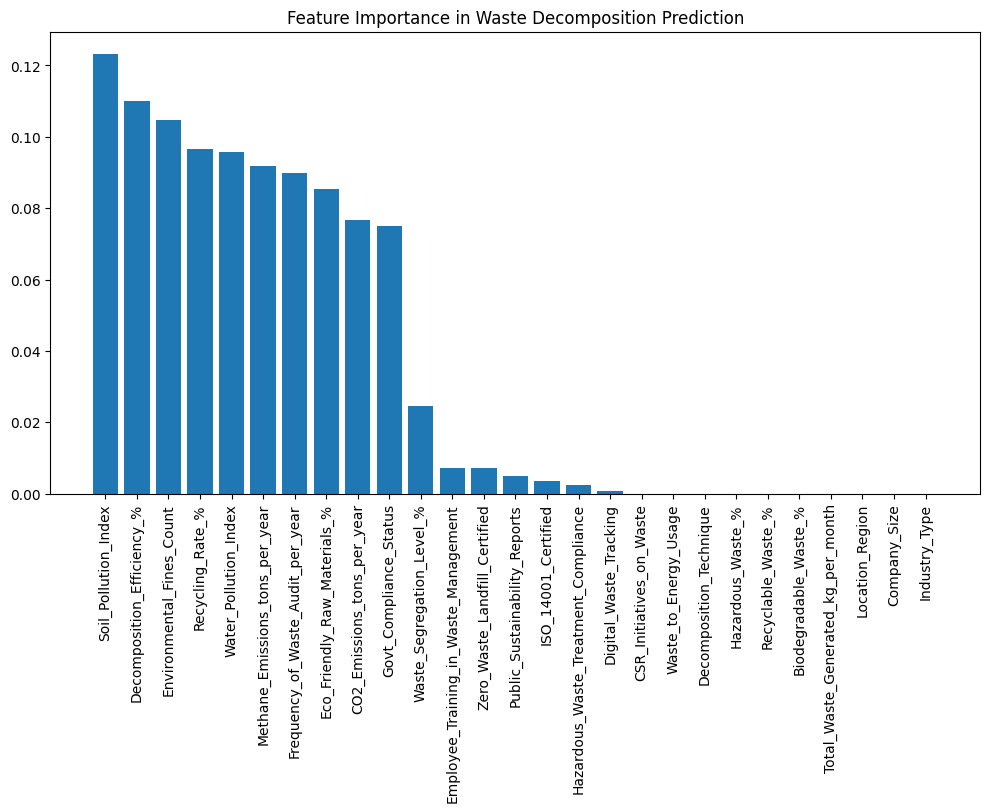

In [49]:
# 6. Check Feature Importance

# To understand which features matter most for prediction:



importances = model.feature_importances_
features = X.columns

# Sort and plot
indices = importances.argsort()[::-1]
plt.figure(figsize=(12,6))
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.title("Feature Importance in Waste Decomposition Prediction")
plt.show()






In [50]:


# 8. Save the Model for Future Use


os.makedirs('../model', exist_ok=True)
joblib.dump(model, "../model/waste_decomposition_model.pkl")
print("✅ Model saved as waste_decomposition_model.pkl")






✅ Model saved as waste_decomposition_model.pkl
